**Вахитов Булат 308 группа**

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 0
b = 5

def f(x):
    return math.sqrt(x) + math.cos(x)

In [ ]:
def generate_intervals(knots, opt=False):

    if opt:
        x_opt_internal = []
        for i in range(knots):
            x_i_opt = ((b - a) * math.cos((2 * i + 1) * math.pi / (2 * knots + 2)) + b + a) / 2
            x_opt_internal.append(x_i_opt)

        y_opt_internal = []
        for x_i_opt in x_opt_internal:
            y_opt_internal.append(f(x_i_opt))
        return x_opt_internal, y_opt_internal
    else:
        x_internal = np.linspace(a, b, knots)
        y_internal = []
        for x_i in x_internal:
            y_internal.append(f(x_i))
        return x_internal.tolist(), y_internal

In [ ]:
def get_separated_differences(knots, opt=False):
    x, y = generate_intervals(knots, opt)
    
    f_sep_diff = []
    f_sep_diff.append(y[0])
    for k in range(2, knots + 1):
        g = []
        for i in range(k):
            g_i = 1
            for j in range(k):
                if i != j:
                    g_i = g_i * (x[i] - x[j])
            g_i = 1 / g_i
            g.append(g_i)

        f_k = 0
        for i in range(len(g)):
            f_k = f_k + g[i] * y[i]
        f_sep_diff.append(f_k)
    return f_sep_diff

In [ ]:
def Newton(x_input, knots, opt=False):
    diff = get_separated_differences(knots, opt)

    x, y = generate_intervals(knots, opt)
    func = 0
    for i in range(len(diff)):
        temp = diff[i]
        for j in range(0, i):
            temp = temp * (x_input - x[j])
        func += temp
    return func

In [ ]:
def Lagrange(x_input, knots, opt):
    x, y = generate_intervals(knots, opt)

    func = 0
    for k in range(knots):
        lagrange_factor = 1
        for i in range(knots):
            if i != k:
                lagrange_factor = lagrange_factor * (x_input - x[i]) / (x[k] - x[i])
        func = func + lagrange_factor * f(x[k])
    return func

In [ ]:
def maximum_deviation_newton(knots, opt, m):
    x_test = np.linspace(a, b, m)
    differences = []
    for x_i in x_test:
        differences.append(abs(f(x_i) - Newton(x_i, knots, opt=opt)))
        #print('F(x) = ', f(x_i), ' ', 'N(x) = ', Newton(x_i, knots, opt=opt), 'x = ', x_i)
    return max(differences)

In [ ]:
def maximum_deviation_lagrange(knots, opt, m):
    x_test = np.linspace(a, b, m)
    differences = []
    for x_i in x_test:
        differences.append(abs(f(x_i) - Lagrange(x_i, knots, opt=opt)))
        #print('F(x) = ', f(x_i), ' ', 'L(x) = ', Lagrange(x_i, knots, opt=opt), 'x = ', x_i)
    return max(differences)

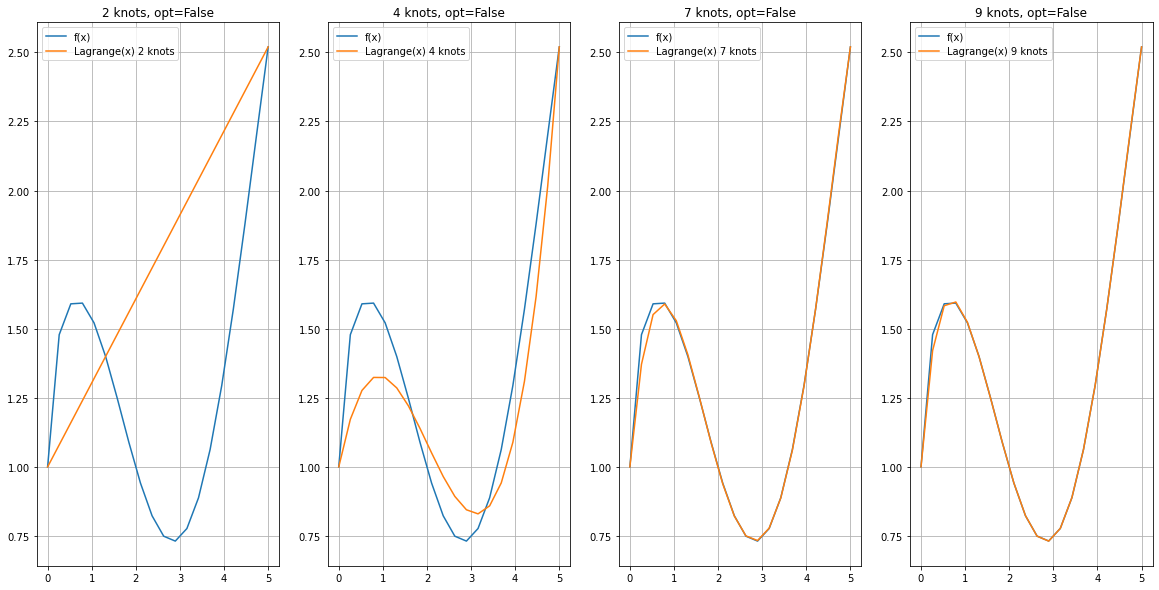

In [ ]:
NUMBER_OF_KNOTS = [2, 4, 7, 9]
opt = False
m = 20

x_test = np.linspace(a, b, m)
y_true = [f(x) for x in x_test]


fig, axes = plt.subplots(1, len(NUMBER_OF_KNOTS))
fig.set_size_inches(20, 10)
for i in range(len(NUMBER_OF_KNOTS)):
  y_predicted = [Lagrange(x, NUMBER_OF_KNOTS[i], opt=opt) for x in x_test]
  axes[i].plot(x_test, y_true, label = "f(x)")
  axes[i].plot(x_test, y_predicted, label = "Lagrange(x) {} knots".format(NUMBER_OF_KNOTS[i]))
  axes[i].legend()
  axes[i].grid()
  axes[i].set_title('{knots} knots, opt={opt}'.format(knots=NUMBER_OF_KNOTS[i], opt=opt))



In [ ]:
#Lagrange
deviation_lagrange = []
deviation_opt_lagrange = []
m = 30

for i in range(2, 11):
    deviation_lagrange.append(maximum_deviation_lagrange(i, False, m))
    deviation_opt_lagrange.append(maximum_deviation_lagrange(i, True, m))
  
print(deviation_lagrange)
print(deviation_opt_lagrange)

[1.180892723688718, 0.8765822244451635, 0.3169248341800215, 0.14666947681641185, 0.14776926733321316, 0.13268518398065976, 0.10745657256685259, 0.08793367125527274, 0.07230221783957003]
[2.0748436799051397, 2.5376238991671913, 1.7195504133039194, 0.11637684889585675, 0.19226679274412684, 0.31135695973345356, 0.259941683790716, 0.22626140265417494, 0.20573879886983537]


In [ ]:
#Newton
deviation_newton = []
deviation_opt_newton = []
m = 30

for i in range(2, 11):
    deviation_newton.append(maximum_deviation_newton(i, False, m))
    deviation_opt_newton.append(maximum_deviation_newton(i, True, m))
  
print(deviation_newton)
print(deviation_opt_newton)

[1.180892723688718, 0.8765822244451636, 0.3169248341800217, 0.1466694768164114, 0.1477692673332125, 0.13268518398065976, 0.10745657256685215, 0.0879336712552714, 0.07230221783957091]
[2.0748436799051397, 2.5376238991671936, 1.7195504133039163, 0.11637684889586297, 0.1922667927441284, 0.3113569597335222, 0.25994168379071003, 0.2262614026541938, 0.20573879886936552]


In [ ]:
import pandas as pd

knots = list(range(2, 11))
test_points = [m] * 9

df_lagrange = pd.DataFrame(list(zip(knots, test_points, deviation_lagrange, deviation_opt_lagrange)), 
                  columns=['Количество узлов', 'Количество проверочных точек', 'Максимальное отклонение RL', 'Максимальное отклонение RLopt '])
df_lagrange

,Количество узлов,Количество проверочных точек,Максимальное отклонение RL,Максимальное отклонение RLopt
0,2,30,1.180893,2.074844
1,3,30,0.876582,2.537624
2,4,30,0.316925,1.719550
3,5,30,0.146669,0.116377
4,6,30,0.147769,0.192267
5,7,30,0.132685,0.311357
6,8,30,0.107457,0.259942
7,9,30,0.087934,0.226261
8,10,30,0.072302,0.205739


In [ ]:
knots = list(range(2, 11))
test_points = [m] * 9

df_newton = pd.DataFrame(list(zip(knots, test_points, deviation_newton, deviation_opt_newton)), 
                  columns=['Количество узлов', 'Количество проверочных точек', 'Максимальное отклонение RL', 'Максимальное отклонение RLopt '])
df_newton

,Количество узлов,Количество проверочных точек,Максимальное отклонение RL,Максимальное отклонение RLopt
0,2,30,1.180893,2.074844
1,3,30,0.876582,2.537624
2,4,30,0.316925,1.719550
3,5,30,0.146669,0.116377
4,6,30,0.147769,0.192267
5,7,30,0.132685,0.311357
6,8,30,0.107457,0.259942
7,9,30,0.087934,0.226261
8,10,30,0.072302,0.205739
